<a href="https://colab.research.google.com/github/GodoyLucas/XPE/blob/main/DESM1%20-%20Desafio%20do%20M%C3%B3dulo%201/DESM1_Desafio_do_M%C3%B3dulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importanto biblioteca Pandas

In [205]:
import pandas as pd

#Declarando variáveis para receberem o link dos dados utilizados no estudo

In [206]:
url_clientes = "https://raw.githubusercontent.com/GodoyLucas/XPE/main/DESM1%20-%20Desafio%20do%20M%C3%B3dulo%201/dados_clientes.csv"
url_idade_clientes = 'https://raw.githubusercontent.com/GodoyLucas/XPE/main/DESM1%20-%20Desafio%20do%20M%C3%B3dulo%201/idade_clientes.csv'
url_estados = 'https://raw.githubusercontent.com/GodoyLucas/XPE/main/DESM1%20-%20Desafio%20do%20M%C3%B3dulo%201/estados_brasileiros.csv'

#Fazendo a leitura e carregamento dos dados

In [207]:
df_clientes = pd.read_csv(url_clientes, sep = ';')
df_idade_clientes = pd.read_csv(url_idade_clientes, sep = ';')
df_estados = pd.read_csv(url_estados, sep = ';', encoding = 'latin-1')

#Verificando conjunto de dados

In [208]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [209]:
df_idade_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [210]:
df_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


Verificado a ausência de dados no campo 'pais' do dataframe dos estados e do campo 'peso' do dataframe de clientes.

#Consolidando dados em um só DataFrame

##Realizando a junção

In [211]:
df_completo = pd.merge(df_clientes, df_idade_clientes, on = 'id_cliente')
df_completo = pd.merge(df_completo, df_estados, on = 'id_estado')
df_completo.head()

,id_cliente,peso,colesterol,genero,id_estado,idade,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,17,Roraima,rr,Brasil
1,54,149.0,183,Masculino,23,48,Roraima,rr,Brasil
2,61,113.0,129,Feminino,23,70,Roraima,rr,Brasil
3,147,NaN,171,Masculino,23,40,Roraima,rr,Brasil
4,154,134.0,162,Feminino,23,26,Roraima,rr,Brasil


##Verificando conjunto de dados após junção em um só DataFrame

In [212]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 0 to 546
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_cliente    547 non-null    int64  
 1   peso          542 non-null    float64
 2   colesterol    547 non-null    int64  
 3   genero        547 non-null    object 
 4   id_estado     547 non-null    int64  
 5   idade         547 non-null    int64  
 6   estado        547 non-null    object 
 7   sigla_estado  547 non-null    object 
 8   pais          502 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 42.7+ KB


##Tratando ausência de dados em alguns registros

Tratamento realizado a partir da exclusão de registros com dados faltantes.

In [213]:
df_completo_tratado = df_completo.dropna(subset=['peso', 'pais'])
df_completo_tratado.reset_index(inplace = True, drop=True)
df_completo_tratado

,id_cliente,peso,colesterol,genero,id_estado,idade,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,17,Roraima,rr,Brasil
1,54,149.0,183,Masculino,23,48,Roraima,rr,Brasil
2,61,113.0,129,Feminino,23,70,Roraima,rr,Brasil
3,154,134.0,162,Feminino,23,26,Roraima,rr,Brasil
4,164,133.0,155,Feminino,23,51,Roraima,rr,Brasil
...,...,...,...,...,...,...,...,...,...
493,452,117.0,138,Feminino,19,61,Rio de Janeiro,rj,Brasil
494,454,106.0,115,Masculino,19,70,Rio de Janeiro,rj,Brasil
495,510,110.0,120,Feminino,19,48,Rio de Janeiro,rj,Brasil
496,516,166.0,200,Feminino,19,47,Rio de Janeiro,rj,Brasil


In [214]:
qtd_registros_descartados = len(df_completo) - len(df_completo_tratado)
qtd_registros_descartados

49

##Consolidado DataFrame com as variáveis que serão analisadas na clusterização

In [215]:
dados_clientes = pd.DataFrame(df_completo_tratado[['id_cliente', 'peso', 'colesterol']])
dados_clientes

,id_cliente,peso,colesterol
0,1,102.0,111
1,54,149.0,183
2,61,113.0,129
3,154,134.0,162
4,164,133.0,155
...,...,...,...
493,452,117.0,138
494,454,106.0,115
495,510,110.0,120
496,516,166.0,200


#Pergunta 1) Analisando a base de idades de clientes, qual é o desvio padrão das idades?

In [216]:
df_idade_clientes.idade.std()

15.160209226877225

#Pergunta 2) Quantos dados ausentes estão presentes nos três datasets? (somatório de dados ausentes se houver)

In [217]:
df_clientes.isnull().sum().sum() + df_idade_clientes.isnull().sum().sum() + df_estados.isnull().sum().sum()

7

#Pergunta 3) Qual comando abaixo realiza a correção de dados ausentes e aplica em um dataset?

Pergunta não relacionada ao conjunto de dados.

#Pergunta 4) Crie um histograma baseado na idade dos clientes e escolha a melhor alternativa que o representa. (utilize 30 barras na visualização ** bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4cd41c640>]],
      dtype=object)

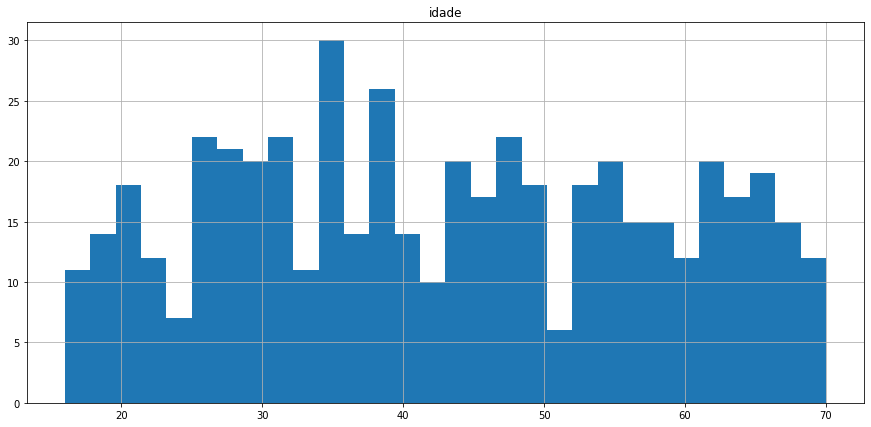

In [218]:
import matplotlib.pyplot as plt
df_completo_tratado.hist(column = 'idade', figsize=(15,7), bins=30)

#Pergunta 5) Qual o valor do WCSS para o primeiro cluster? (utilize random_state=0)

Aqui eu percebo um pergunta que me confundi. WCSS não seria uma métrica para avaliar um determinado agrupamento com uma quantidade determinada quantidade de clusters? Dentre os clusters do agrupamento, quem seria o primeiro deles?

Com base no que pude interpretar da aula gravada, decido calcular o Within-Cluster Sum of Square para o agrupamento de dados em um só cluster:

In [219]:
from sklearn.cluster import KMeans

k = 1

kmeans = KMeans(n_clusters = k, random_state=0)
kmeans.fit(X=dados_clientes[['peso', 'colesterol']])
kmeans.inertia_

1248240.6686746983

#Pergunta 6) Qual o valor do WCSS para o número de clusters = 4? (utilize random_state=0)

Para o número de 4 clusters, ou seja, 4 centróides de agrupamento para o conjunto de dados, k = 4.

In [220]:
from sklearn.cluster import KMeans

k = 4

kmeans = KMeans(n_clusters = k, random_state=0)
kmeans.fit(X=dados_clientes[['peso', 'colesterol']])
kmeans.inertia_

73826.33539515291

#Pergunta 7) São exemplos de aprendizado supervisionado:

Pergunta não relacionada ao conjunto de dados.

#Pergunta 8) O ETL são ferramentas responsáveis pela:

Pergunta não relacionada ao conjunto de dados.

#Pergunta 9) Qual o valor do centroide para o grupo de alto risco? Leve em consideração as variáveis na seguinte sequência: peso e colesterol.

Conforme indicado no enunciado do Desafio, deve-se adotar quatro grandes grupos, ou seja, 4 clusters com as seguintes definições:

1. Alto Risco. 
2. Risco Moderado alto.
3. Risco Moderado baixo.
4. Baixo risco.

In [221]:
k = 4

kmeans_clientes = KMeans(n_clusters=k, random_state=0)
dados_clientes['cluster'] = kmeans_clientes.fit_predict(dados_clientes[['peso', 'colesterol']])

centroides_clusters = kmeans_clientes.cluster_centers_

import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

grafico = px.scatter(x = dados_clientes['peso'],
                     y = dados_clientes['colesterol'],
                     color = dados_clientes['cluster'])

grafico_centroide = px.scatter(x=centroides_clusters[:,0],
                               y=centroides_clusters[:,1],
                               size = [7,7,7,7])

grafico_final = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final.show()

In [222]:
dados_clientes.loc[dados_clientes['cluster']==1, 'nome_cluster'] = 'Baixo risco'
dados_clientes.loc[dados_clientes['cluster']==3, 'nome_cluster'] = 'Risco Moderado baixo'
dados_clientes.loc[dados_clientes['cluster']==0, 'nome_cluster'] = 'Risco Moderado alto'
dados_clientes.loc[dados_clientes['cluster']==2, 'nome_cluster'] = 'Alto Risco'

In [223]:
centroides_clusters

array([[152.22429907, 185.86915888],
       [106.84375   , 119.4296875 ],
       [184.32394366, 218.98591549],
       [127.34710744, 153.95867769]])

O centróide do cluster dos clientes de Alto Risco é:

---



In [224]:
centroides_clusters[2]

array([184.32394366, 218.98591549])

In [227]:
dados_clientes

,id_cliente,peso,colesterol,cluster,nome_cluster
0,1,102.0,111,1,Baixo risco
1,54,149.0,183,0,Risco Moderado alto
2,61,113.0,129,1,Baixo risco
3,154,134.0,162,3,Risco Moderado baixo
4,164,133.0,155,3,Risco Moderado baixo
...,...,...,...,...,...
493,452,117.0,138,3,Risco Moderado baixo
494,454,106.0,115,1,Baixo risco
495,510,110.0,120,1,Baixo risco
496,516,166.0,200,0,Risco Moderado alto


#Pergunta 10) Qual a média de idades para o cluster de alto risco?

In [229]:
campos_esquerda = ['id_cliente', 'estado', 'genero', 'idade', 'peso', 'colesterol']
campos_direita = ['id_cliente', 'nome_cluster']

dados_clusterizados = pd.merge(df_completo_tratado[campos_esquerda], dados_clientes[campos_direita], on = 'id_cliente')
dados_clusterizados

,id_cliente,estado,genero,idade,peso,colesterol,nome_cluster
0,1,Roraima,Masculino,17,102.0,111,Baixo risco
1,54,Roraima,Masculino,48,149.0,183,Risco Moderado alto
2,61,Roraima,Feminino,70,113.0,129,Baixo risco
3,154,Roraima,Feminino,26,134.0,162,Risco Moderado baixo
4,164,Roraima,Feminino,51,133.0,155,Risco Moderado baixo
...,...,...,...,...,...,...,...
493,452,Rio de Janeiro,Feminino,61,117.0,138,Risco Moderado baixo
494,454,Rio de Janeiro,Masculino,70,106.0,115,Baixo risco
495,510,Rio de Janeiro,Feminino,48,110.0,120,Baixo risco
496,516,Rio de Janeiro,Feminino,47,166.0,200,Risco Moderado alto


In [230]:
dados_clusterizados.query("nome_cluster == 'Alto Risco'")['idade'].mean()

43.20422535211268

#Pergunta 11) Qual o valor mínimo do colesterol coletado para o grupo de baixo Risco?

In [231]:
dados_clusterizados.query("nome_cluster == 'Baixo risco'")['colesterol'].min()

102

#Pergunta 12) Qual o peso máximo presente no cluster de alto risco?

In [232]:
dados_clusterizados.query("nome_cluster == 'Alto Risco'")['peso'].max()

203.0

#Pergunta 13) Qual o estado com maior número de pessoas que estão no grupo de risco Moderado alto?

In [239]:
dados_clusterizados.groupby('estado')['nome_cluster'].describe().query("top == 'Risco Moderado alto'")

,count,unique,top,freq
estado,,,,
Mato Grosso do Sul,21,4,Risco Moderado alto,7
Pernambuco,17,4,Risco Moderado alto,7
Rondônia,20,4,Risco Moderado alto,7
São Paulo,12,4,Risco Moderado alto,4


#Pergunta 14) Qual a média dos pesos para o grupo de risco moderado baixo?

In [240]:
dados_clusterizados.query("nome_cluster == 'Risco Moderado baixo'")['peso'].mean()

127.4672131147541

#Pergunta 15) Assinale a alternativa CORRETA:

O grupo de baixo risco possui 76 pessoas do gênero feminino. (Falsa)

In [242]:
len(dados_clusterizados.query("nome_cluster == 'Baixo risco' & genero == 'Feminino'"))

57

O grupo de alto risco possui média maior de colesterol para o gênero feminino em comparação ao gênero masculino. (Verdadeira)

O desvio padrão para a variável colesterol do grupo de risco moderado alto é de 9.19 para o gênero feminino. (Falsa)

In [243]:
dados_clusterizados.groupby(['nome_cluster', 'genero'])[['colesterol']].describe()

colesterol                                \
                                    count        mean        std    min   
nome_cluster         genero                                               
Alto Risco           Feminino        60.0  220.650000   6.456701  204.0   
                     Masculino       82.0  217.768293   8.939162  204.0   
Baixo risco          Feminino        57.0  122.175439  10.252391  102.0   
                     Masculino       71.0  117.225352   9.677953  102.0   
Risco Moderado alto  Feminino        59.0  186.152542  10.182496  168.0   
                     Masculino       47.0  185.893617   9.311596  172.0   
Risco Moderado baixo Feminino        64.0  156.281250   9.798718  138.0   
                     Masculino       58.0  151.637931   9.389614  138.0   

                                                             
                                   25%    50%    75%    max  
nome_cluster         genero                                  
Alto Risco           Feminino   216.75  221.0  225.0  235.0  
                     Masculino  211.00  219.0  225.0  235.0  
Baixo risco          Feminino   112.00  124.0  130.0  137.0  
                     Masculino  109.00  115.0  126.0  136.0  
Risco Moderado alto  Feminino   176.00  189.0  194.5  201.0  
                     Masculino  178.00  184.0  192.5  203.0  
Risco Moderado baixo Feminino   149.00  156.0  166.0  171.0  
                     Masculino  143.25  151.5  158.0  168.0

Nenhuma das alternativas. (Falsa)